# Create an Information System for a selected domain of interest.

You may use any back-end, including a DB developed in another module.
You may use any front-end, including CLI, GUI, web and API.
Describe the requirements of the information system, including users, data requirements, search, sorting, entry, update, validation, integrity, reporting etc.
Implement and test the Information System, and document your implementation thoroughly.
You must use public git (e.g. GitHub) to manage your source and versioning, with regular frequent commits.
You must attribute all code not written from scratch, either in accordance with its licence, if applicable, or if not, #taken from ...
You may use any programming language, however example programs will be presented in Python.
Groups must not exceed three members.
There will be a presentation in January, with the Moderator present, in order to assist in grading the work
Technical questions may be asked of any member of the group, and the assignment is individually marked. The contribution reports and GitHub record may be used to direct questions and to allocate marks.
All groups must submit a group report, containing individual contribution reports and a link to GitHub
All individuals must submit a reflective report on their experience of the group, assignment, and module

https://github.com/sabithamaram/PIS_B9IS123_CA2


Choose a grade level: 1 or 2
1

Choose year: 2014, 2015 or 2016
2014

Pick a choice to process data in the way required:
1) Claculate the class average
2) Subject-wise marks
3) Student-wise marks
4) Plot graph of class growth
4
Pick the growth type:
1) Student Growth
2) Class Growth
2


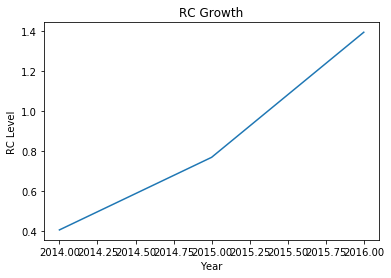

AttributeError: 'Avg' object has no attribute 'lis'

In [13]:
import pandas as pd
from pandas import DataFrame
from tabulate import tabulate as tb
import matplotlib.pyplot as plt
import numpy as np

rc_data = []
lis_data = []
wri_data = []
math_data = []


class ReadData:
    def __init__(self, user_grade_choice=None, user_year_choice=None):
        self.user_grade_choice = user_grade_choice
        self.user_year_choice = user_year_choice
        
    def read_file(self):
        if self.user_grade_choice == 1:
            if self.user_year_choice == 2014:
                return pd.read_csv(r'/Users/srikanthshileshpasam/OneDrive - Dublin Business School (DBS)/Python/CA2/Data/Class_1_2014.csv')
            elif year_choice == 2015:
                return pd.read_csv(r'/Users/srikanthshileshpasam/OneDrive - Dublin Business School (DBS)/Python/CA2/Data/Class_1_2015.csv')
            elif year_choice == 2016:
                return pd.read_csv(r'/Users/srikanthshileshpasam/OneDrive - Dublin Business School (DBS)/Python/CA2/Data/Class_1_2016.csv')
            else:
                return 'Selected year data does not exist!'
        
        elif self.user_grade_choice == 2:
            if self.user_year_choice == 2014:
                return pd.read_csv(r'/Users/srikanthshileshpasam/OneDrive - Dublin Business School (DBS)/Python/CA2/Data/Class_2_2014.csv')
            elif year_choice == 2015:
                return pd.read_csv(r'/Users/srikanthshileshpasam/OneDrive - Dublin Business School (DBS)/Python/CA2/Data/Class_2_2015.csv')
            elif year_choice == 2016:
                return pd.read_csv(r'/Users/srikanthshileshpasam/OneDrive - Dublin Business School (DBS)/Python/CA2/Data/Class_2_2016.csv')
            else:
                return 'Selected year data does not exist!'
        
        else:
            return 'Selected grade data does not exist!'
        
    def all_files(self, graph_choice):
        self.graph_choice = grade_choice
        
        if graph_choice == 1:
            first_data_file = pd.read_csv(r'/Users/srikanthshileshpasam/OneDrive - Dublin Business School (DBS)/Python/CA2/Data/Class_1_2014.csv')
            sec_data_file = pd.read_csv(r'/Users/srikanthshileshpasam/OneDrive - Dublin Business School (DBS)/Python/CA2/Data/Class_1_2015.csv')
            third_data_file = pd.read_csv(r'/Users/srikanthshileshpasam/OneDrive - Dublin Business School (DBS)/Python/CA2/Data/Class_1_2016.csv')
            return (first_data_file, sec_data_file, third_data_file)
        
        elif graph_choice == 2:
            first_data_file = pd.read_csv(r'/Users/srikanthshileshpasam/OneDrive - Dublin Business School (DBS)/Python/CA2/Data/Class_2_2014.csv')
            sec_data_file = pd.read_csv(r'/Users/srikanthshileshpasam/OneDrive - Dublin Business School (DBS)/Python/CA2/Data/Class_2_2015.csv')
            third_data_file = pd.read_csv(r'/Users/srikanthshileshpasam/OneDrive - Dublin Business School (DBS)/Python/CA2/Data/Class_2_2016.csv')
            return (first_data_file, sec_data_file, third_data_file)
        else:
            return 'Files missing!'

class Avg:
    
    def __init__(self, avg_data):
        self.avg_data = avg_data
    
    def rc(self):
        for index, row in self.avg_data.iterrows():
            reading_row_rc = row['RC']
            rc_data.append(reading_row_rc)
        return sum(rc_data)/len(rc_data)
    
    def listening(self):
        for index, row in self.avg_data.iterrows():
            reading_row_lis = row['Listening']
            lis_data.append(reading_row_lis)
        return sum(lis_data)/len(lis_data)
    
    def writing(self):
        for index, row in self.avg_data.iterrows():
            reading_row_wri = row['Writing']
            wri_data.append(reading_row_wri)
        return sum(wri_data)/len(wri_data)
    
    def math(self):
        for index, row in self.avg_data.iterrows():
            reading_row_math = row['Math']
            math_data.append(reading_row_math)
        return (sum(math_data)/len(math_data)) * 100
    

class SubjectMarks:
    
    def __init__(self, sub_data):
        self.sub_data = sub_data
        
    def rc(self):
        data_df = self.sub_data[['Order', 'Name', 'RC']]
        return tb(data_df, headers=["Roll Order", "Name", "RC"], tablefmt='grid', showindex='never')
            
    def listening(self):
        data_df = self.sub_data[['Order', 'Name', 'Listening']]
        return tb(data_df, headers=["Roll Order", "Name", "Listening"], tablefmt='grid', showindex='never')
        
    def writing(self):
        data_df = self.sub_data[['Order', 'Name', 'Writing']]
        return tb(data_df, headers=["Roll Order", "Name", "Writing"], tablefmt='grid', showindex='never')
            
    def math(self):
        data_df = self.sub_data[['Order', 'Name', 'Math']]
        return tb(data_df, headers=["Roll Order", "Name", "Math"], tablefmt='grid', showindex='never')
        
        
class StudentMarks:
    
    def __init__(self, stu_data, stu_name):
        self.stu_data = stu_data
        self.stu_name = stu_name
        
    def marks(self):
        data_df = pd.DataFrame(self.stu_data, columns = ['Order', 'Name', 'RC', 'Listening', 'Writing', 'Math'])
        data_df = data_df[data_df['Name'].str.contains(self.stu_name)]
        if data_df.empty == True:
            return 'No student found!'
        else:
            return tb(data_df, headers=["Roll Order", "Name", "RC", "Listening", "Writing", "Math"], tablefmt='grid', showindex='never')   

        
class GraphPlot:
    
    def __init__(self, graph_data_1, graph_data_2, graph_data_3):
        self.graph_data_1 = graph_data_1
        self.graph_data_2 = graph_data_2
        self.graph_data_3 = graph_data_3
    
    def class_plot_rc(self):
        class_call = Avg(self.graph_data_1)
        rc_1 = class_call.rc()
        class_call = Avg(self.graph_data_2)
        rc_2 = class_call.rc()
        class_call = Avg(self.graph_data_3)
        rc_3 = class_call.rc()
        
        x = [2014, 2015, 2016]
        y = [rc_1, rc_2, rc_3]
        
        plt.plot(x,y)
        plt.xlabel('Year')
        plt.ylabel('RC Level')
        plt.title('RC Growth')
        
        show = plt.show()
        
        return show
            
    def class_plot_lis(self):
        class_call = Avg(self.graph_data_1)
        lis_1 = class_call.listening()
        class_call = Avg(self.graph_data_2)
        lis_2 = class_call.listening()
        class_call = Avg(self.graph_data_3)
        lis_3 = class_call.listening()
        
        return show
        
    def class_plot_writing(self):
        class_call = Avg(self.graph_data_1)
        lis_1 = class_call.writing()
        class_call = Avg(self.graph_data_2)
        lis_2 = class_call.writing()
        class_call = Avg(self.graph_data_3)
        lis_3 = class_call.writing()
        
        return show
        
    def class_plot_math(self):
        class_call = Avg(self.graph_data_1)
        lis_1 = class_call.math()
        class_call = Avg(self.graph_data_2)
        lis_2 = class_call.math()
        class_call = Avg(self.graph_data_3)
        lis_3 = class_call.math()
        
        return show
        
    def stu_plot(self, student_name):
        self.student_name = student_name
        return 'working'

    

grade_choice = int(input('\nChoose a grade level: 1 or 2\n'))
year_choice = int(input('\nChoose year: 2014, 2015 or 2016\n'))

load_data = ReadData(grade_choice, year_choice)
master_data_file = load_data.read_file()


choice = int(input('\nPick a choice to process data in the way required:\n1) Claculate the class average\n2) Subject-wise marks\n3) Student-wise marks\n4) Plot graph of class growth\n'))
if choice == 1:
    class_average = Avg(master_data_file)
    class_average_rc = class_average.rc()
    class_average_lis = class_average.listening()
    class_average_writing = class_average.writing()
    class_average_math = class_average.math()
    
    print('\n\n\nThe class average is as below:\n\nRC: %.2f' %class_average_rc)
    print('\nListening: %.2f' %class_average_lis)
    print('\nWriting: %.2f' %class_average_writing)
    print('\nMath: %.2f' %class_average_math)
    
elif choice == 2:
    subject_wise_marks = SubjectMarks(master_data_file)
    class_rc = subject_wise_marks.rc()
    class_lis = subject_wise_marks.listening()
    class_writing = subject_wise_marks.writing()
    class_math = subject_wise_marks.math()
    
    print(f'\n\n\nThe class RC marks are:\n{class_rc}')
    print(f'\n\n\nThe class Listening marks are:\n{class_lis}')
    print(f'\n\n\nThe class Writing marks are:\n{class_writing}')
    print(f'\n\n\nThe class Math marks are:\n{class_math}')
    
elif choice == 3:
    student = input('\nEnter name of student\n')
    student_wise_marks = StudentMarks(master_data_file, student.title())
    student_marks = student_wise_marks.marks()
    
    print(f'\nMarks for {student} are as follows:\n{student_marks}')
    
elif choice == 4:
    comp_choice = int(input('Pick the growth type:\n1) Student Growth\n2) Class Growth\n'))
    first_file, sec_file, third_file = load_data.all_files(grade_choice)
    
    graph_plot = GraphPlot(first_file, sec_file, third_file)
    
    if comp_choice == 1:
        student = input('\nEnter name of student\n')
        stu_growth = graph_plot.stu_plot(student.title())
        print(f'\nThe student growth details are as follows:\n{stu_growth}')
    
    elif comp_choice == 2:
        class_growth_rc = graph_plot.class_plot_rc()
        class_growth_lis = graph_plot.class_plot_lis()
        class_growth_writing = graph_plot.class_plot_writing()
        class_growth_math = graph_plot.class_plot_math()
        
        print(f'\nThe class growth for RC is as follows:\n{class_growth_rc}')
        print(f'\nThe class growth for listening is as follows:\n{class_growth_lis}')
        print(f'\nThe class growth for writing is as follows:\n{class_growth_writing}')
        print(f'\nThe class growth for math is as follows:\n{class_growth_math}')
        
    else:
        print('Invalid entry!')
   